In [1]:
import pandas as pd
import numpy as np
from matplotlib import pyplot as plt
%matplotlib inline

In [2]:
advert = pd.read_csv('Advertising.csv')

In [6]:
print(advert.shape)
print(advert.head())
advert.info()

(200, 5)
   Unnamed: 0     TV  radio  newspaper  sales
0           1  230.1   37.8       69.2   22.1
1           2   44.5   39.3       45.1   10.4
2           3   17.2   45.9       69.3    9.3
3           4  151.5   41.3       58.5   18.5
4           5  180.8   10.8       58.4   12.9
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200 entries, 0 to 199
Data columns (total 5 columns):
Unnamed: 0    200 non-null int64
TV            200 non-null float64
radio         200 non-null float64
newspaper     200 non-null float64
sales         200 non-null float64
dtypes: float64(4), int64(1)
memory usage: 7.9 KB


In [11]:
advert.columns

Index(['Unnamed: 0', 'TV', 'radio', 'newspaper', 'sales'], dtype='object')

In [12]:
advert = advert.drop(['Unnamed: 0'],axis = 1)
advert.shape

(200, 4)

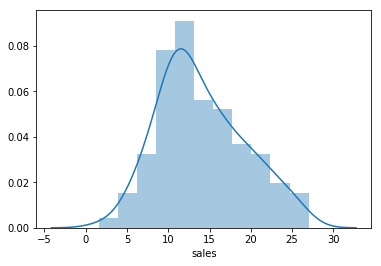

In [16]:
import seaborn as sns
sns.distplot(advert.sales)

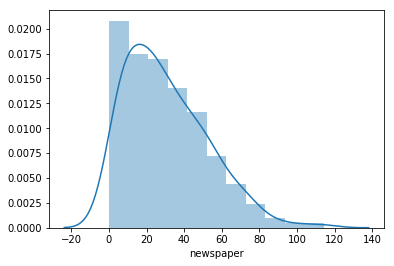

In [17]:
sns.distplot(advert.newspaper)

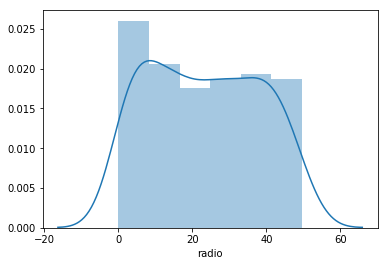

In [18]:
sns.distplot(advert.radio)

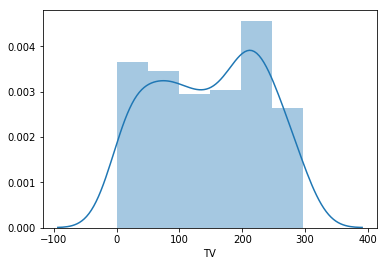

In [19]:
sns.distplot(advert.TV)

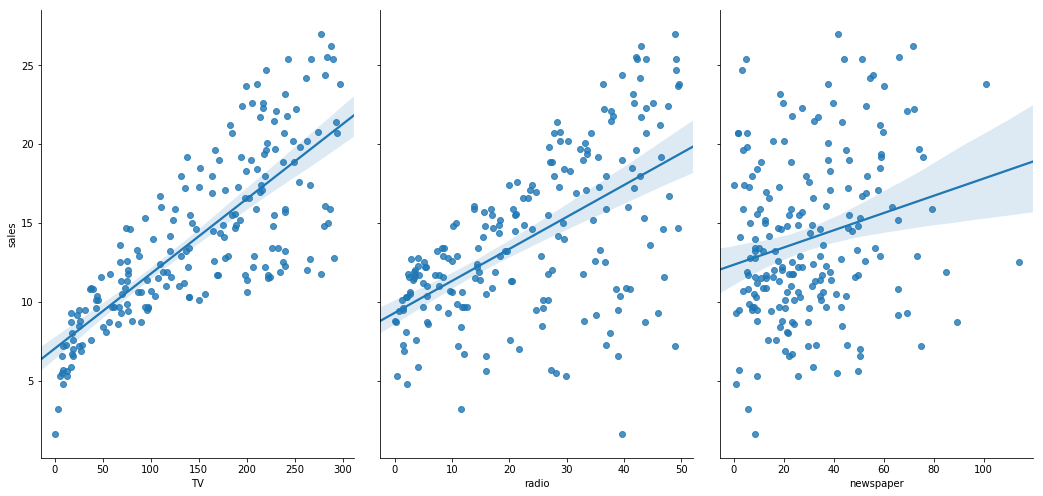

In [20]:
sns.pairplot(advert, x_vars=['TV',  'radio', 'newspaper'],y_vars=['sales'], height = 7, aspect =0.7,
            kind = 'reg')

In [21]:
advert.TV.corr(advert.sales)

0.7822244248616061

In [22]:
advert.corr()

,TV,radio,newspaper,sales
TV,1.000000,0.054809,0.056648,0.782224
radio,0.054809,1.000000,0.354104,0.576223
newspaper,0.056648,0.354104,1.000000,0.228299
sales,0.782224,0.576223,0.228299,1.000000


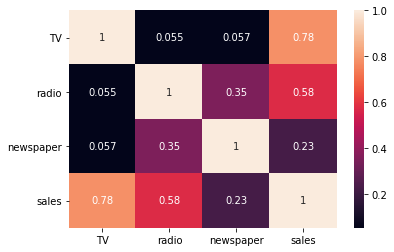

In [24]:
sns.heatmap(advert.corr(), annot = True)

In [42]:
X = advert[['TV']]

In [43]:
X.shape

(200, 1)

In [41]:
y = advert[['sales']]

In [45]:
from sklearn.model_selection import train_test_split
x_train,x_test, y_train, y_test = train_test_split(X, y, test_size =0.3, random_state = 0)
y_train.shape

(140, 1)

In [46]:
from sklearn.linear_model import LinearRegression
linreg = LinearRegression()
linreg.fit(x_train, y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None,
         normalize=False)

In [47]:
print(linreg.intercept_)
print(linreg.coef_)

[7.31081017]
[[0.04581434]]


In [49]:
y_hat = linreg.predict(x_test)
y_hat[:5]

array([[10.48116264],
       [ 9.60152727],
       [11.4524267 ],
       [20.58322509],
       [15.1084112 ]])

In [52]:
from sklearn import metrics

In [54]:
metrics.mean_absolute_error(y_test, y_hat)

2.057546579430008

In [55]:
metrics.mean_squared_error(y_test, y_hat)

7.497479593464676

In [56]:
np.sqrt(metrics.mean_squared_error(y_test, y_hat))

2.738152587688399